In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Identifica a los alumnos con el mismo apellido que van en la misma escuela y evalúa las familias 

In [31]:
df2=pd.read_csv('/content/cleanstudentscomplete.csv')
df2.drop(['Unnamed: 0'],inplace=True, axis='columns')
df2=df2.sort_values('reading_score',ascending=False).head(int(df2['Student ID'].count()*.1)).reset_index()
apellido=df2['student_name'].str.split(expand=True)
df2=pd.concat([df2,apellido[1]],axis=1)
df2=df2.groupby(['school_name',1])['Student ID'].count()

In [32]:
df2=pd.DataFrame(df2)
df2=df2[df2['Student ID']>1].reset_index()
df2

,school_name,1,Student ID
0,Bailey High School,Adams,2
1,Bailey High School,Allen,4
2,Bailey High School,Anderson,2
3,Bailey High School,Baker,4
4,Bailey High School,Bradley,2
...,...,...,...
592,Wright High School,Thomas,2
593,Wright High School,Thompson,3
594,Wright High School,Torres,2
595,Wright High School,Williams,3


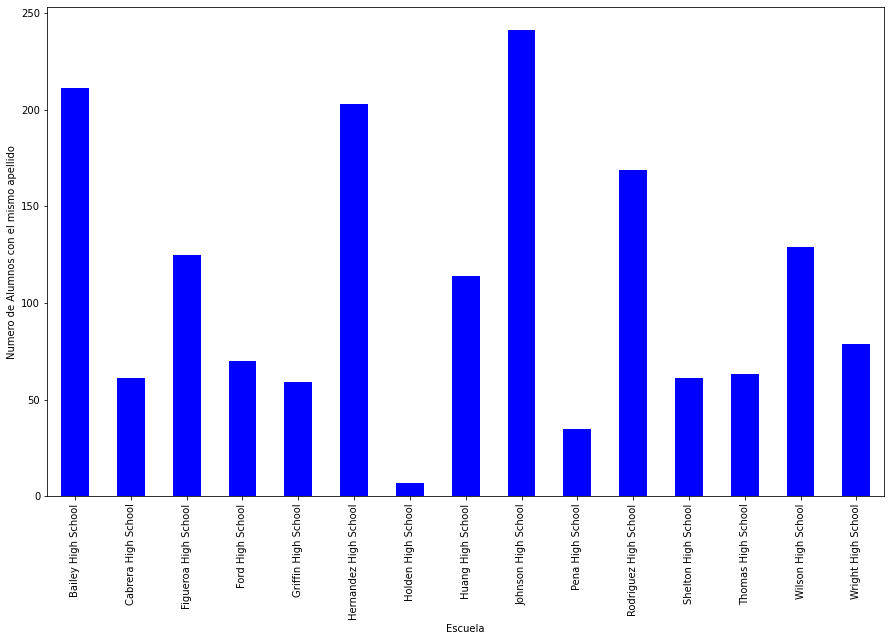

In [35]:
mismoape=df2.groupby(['school_name'])['Student ID'].sum()
mismoape.plot(kind='bar', color=['blue'],figsize=(15,9),xlabel='Escuela',ylabel='Numero de Alumnos con el mismo apellido')